# Fediverse Selection

The Fediverse is a collection of federated instances. These instances share content with each other, which content gets shared depends on who follows who (and other factors such as relays). The aim of this notebook is to understand how the choice of instance affects the visible content.

My general assumption would be that communities with shared interests (e.g. Taylor Swift) choose the same instances. This means that content covering this interest (e.g. Taylor Swift) will be more present on these instances. If this assumption holds true "Fediverse Selection" occurs.

While this notebook only talks about hashtags, federation and Fediverse Selection affect other things, like the visibility of replies. So if you are on an "Taylor Swift" - instance, most of your replies might refer to Taylor Swift. If you are on a different instance, not a single reply might involve Taylor Swift.

#### Future work

If the Fediverse Selection occurs, the methods of this notebook can be used to build an Instance Recommender. Choose hashtags you want to see and an instance is recommended where this hashtag features more prominently.

In [1]:
from datetime import datetime, timedelta
import pytz
import json

from mastodon_recommender.federation_index import FederationIndex

%matplotlib inline

import matplotlib.pyplot as plt

plt.rc("font", size=6)

## Federation Index

In order to measure Federation, we will use the Federation Index. In order to define it, we will need three quantities. A list of instances, `instance_names`, a list of hashtags `hashtags`, and a time frame specified below by `time_limit`. The time frame is `now() - time_limit, now()`.

In [2]:

with open('mastodon-instances.json', 'r') as f:
    instances_list = json.load(f)
instance_names = [x["name"] for x in instances_list]
# instance_names = instance_names

hashtags = ["fediverse", "circleci", "birds", "dataviz", "ftx", "blackmastodon", "lgbtq", "uspolitics", "climatechange", "covid", "today",  "hiphop", "ai", "bayern", "football", "twitter", "wordpress", "Fensterfreitag", "amazon"]

time_limit = datetime.now(tz=pytz.utc) - timedelta(hours=24)

### Federation Index for Hashtag

We will start by computing the Federation Index for the hashtag `fediverse`. For this, we retrieve the top `maximal_number_of_post_per_instance=5` posts on the local timeline from each instance. See https://docs.joinmastodon.org/methods/timelines/#tag with `local=true`. The collection of the resulting posts will be our test set. Variable `urls_to_test` in `federation_index.py`.

The availability of posts is shown in the following UpSet plot. A vertical slice represents the availability. A black dot indicating that the post is available. The bar chart on top indicates the corresponding number of posts. 

{'matrix': <AxesSubplot: >,
 'shading': <AxesSubplot: >,
 'totals': <AxesSubplot: >,
 'intersections': <AxesSubplot: ylabel='Intersection size'>}

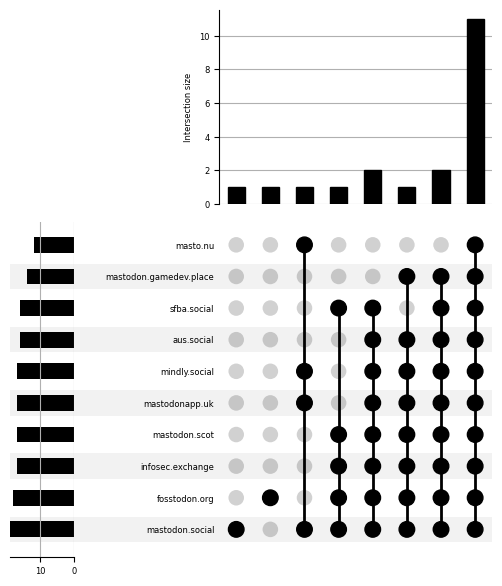

In [6]:
fi = FederationIndex(instance_names, time_limit, maximal_number_of_post_per_instance=10)
await fi.fetch_for_hashtag("lgbtq")
fi.plot_upset_for_hashtag("lgbtq")

Now we determine for each instance the number
```
Federation Index(Instance) = #(url of urls_to_test in hashtag timeline of instance) / #(urls_to_test)
```
for this the hashtag timeline is queried for the timeframe described by `time_limit`.

<AxesSubplot: title={'center': 'Federation Index Deviation for #lgbtq'}, xlabel='federation_index', ylabel='instance'>

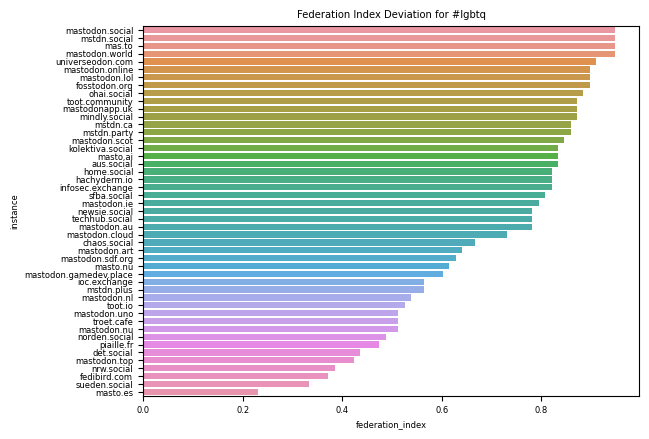

In [7]:
fi.plot_federation_index_for_hashtag("lgbtq")

### Federation Index

We can now compute the Federation Index for the hashtags in `hashtags`. The Federation Index is now the mean of the federation indices for the hashtags.

<AxesSubplot: title={'center': 'Mean Federation Index Deviation'}, xlabel='federation_index', ylabel='instance'>

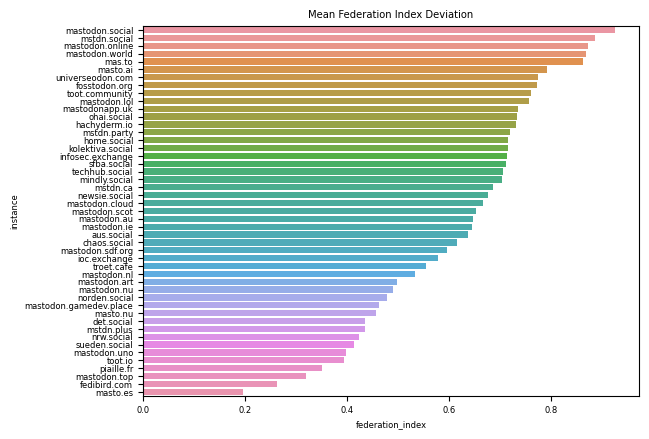

In [8]:
for hashtag in hashtags:
    await fi.fetch_for_hashtag(hashtag)

fi.plot_federation_index()

### Federation Index Deviation

Now we can take the difference between the Federation Index for a Hashtag and the Federation Index. This number being large and positive should mean that this instance focuses more on this hashtag. A large negative number means it's not as relevant.

<AxesSubplot: title={'center': 'Federation Index Deviation for #lgbtq'}, xlabel='federation_index', ylabel='instance'>

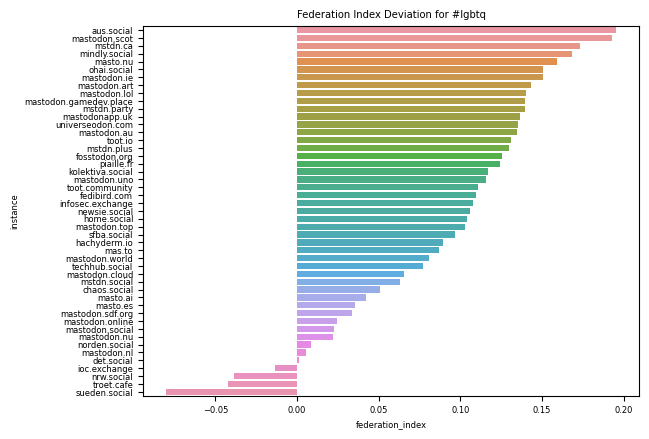

In [9]:
fi.plot_federation_index_deviation_for_hashtag('lgbtq')

I'm still thinking about the next quantity. It's the standard deviation of the federation index for hashtag by instance.

TODO: Check if correlated to size.

<AxesSubplot: title={'center': 'Standatd Deviation of Federation Index'}, xlabel='federation_index', ylabel='instance'>

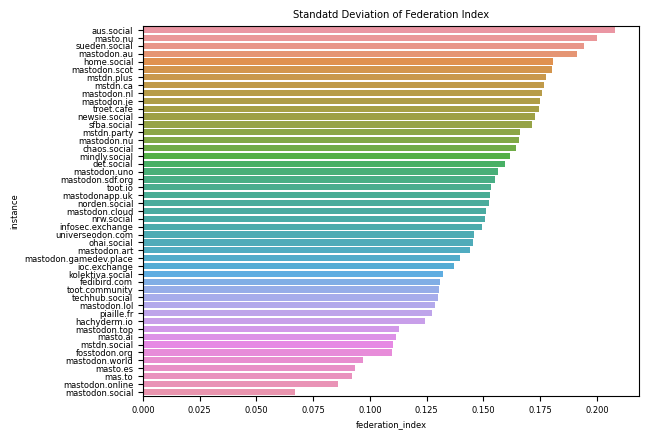

In [14]:
fi.plot_federation_focus()

### Federation Index Deviation for an Instance

So now that we have this Federation Index, we can look at it for an instance and see what it is all about. For example https://infosec.exchange/explore states

> A Mastodon instance for info/cyber security-minded people. 

and the chart below matches pretty well.

<AxesSubplot: title={'center': 'Federation Index Deviation for infosec.exchange'}, xlabel='federation_index', ylabel='hashtag'>

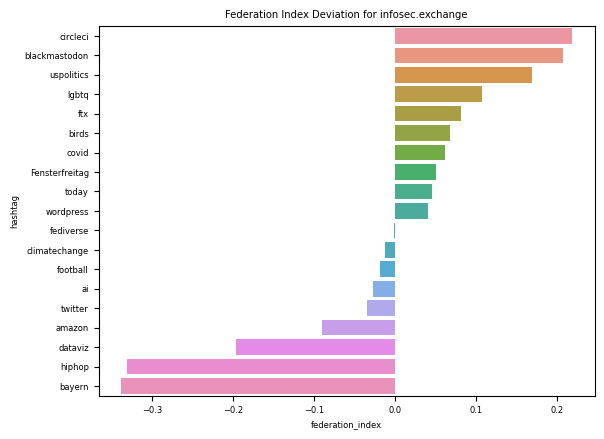

In [10]:
fi.plot_federation_index_deviation_for_instance('infosec.exchange')

chaos.social states
> chaos.social – a Fediverse instance for & by the Chaos community

and an emphasis on a protest in Germany against a coal camp seems fitting.

<AxesSubplot: title={'center': 'Federation Index Deviation for chaos.social'}, xlabel='federation_index', ylabel='hashtag'>

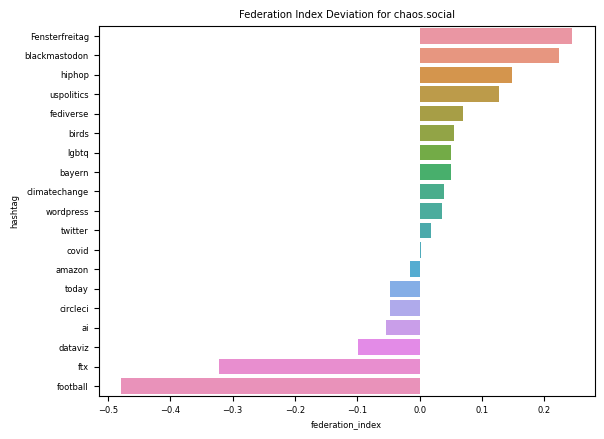

In [11]:
fi.plot_federation_index_deviation_for_instance('chaos.social')

mindly.social states
> Mindly.Social is an English speaking, friendly Mastodon instance created for people who want to use their brains and their hearts to make social networking more social. 🧠💖

and I guess it works too

<AxesSubplot: title={'center': 'Federation Index Deviation for mindly.social'}, xlabel='federation_index', ylabel='hashtag'>

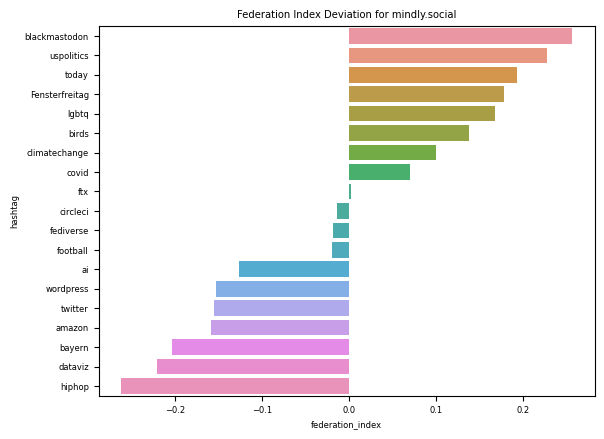

In [12]:
fi.plot_federation_index_deviation_for_instance('mindly.social')

<AxesSubplot: title={'center': 'Federation Index Deviation for mas.to'}, xlabel='federation_index', ylabel='hashtag'>

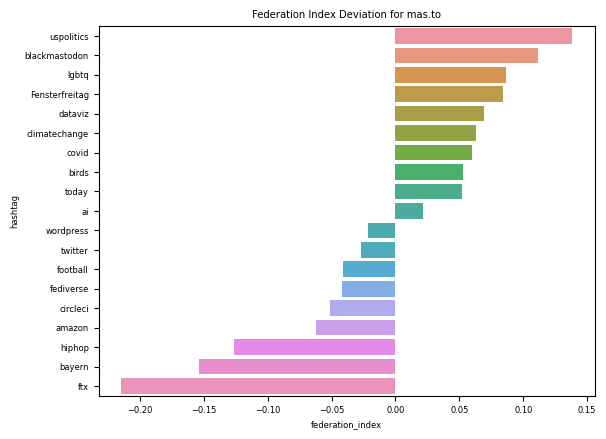

In [13]:
fi.plot_federation_index_deviation_for_instance('mas.to')